# Why Spatial Coherence?
Imaging-by-Sequencing is a new approach in spatial biology, allowing us to see how and which molecules are arranged in biological samples. This method is powerful but still new, so we need reliable ways to check if the images we get truly match the ground truth. This is where spatial coherence comes in. It's a measure of how well the image reflects real molecular distances. This package offers a new way to check this, focusing on quantiative measures, making sure we can trust the images produced by these techniques. 

# What this package does
* Handles graphs as sparse matrices for efficiency
* Simulates spatial proximity graphs, such as KNN graphs, e-ball graphs, Voronoi tesselations and more
* Handles experimental graphs in both .csv format and .pickle format
* Gets graph properties if desired, such as the degree, clustering and shortest path distribution
* Checks quantitative measures of spatially coherent graphs, to see how 'Euclidean' the network is
* Offers methods to reconstructs images from purely network data




## Installing the `network_spatial_coherence` Package


In [1]:
# !pip install git+https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git
    
# # Use this this if the github has been updated
!pip install --upgrade --force-reinstall git+https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git




  Cloning https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git to /tmp/pip-req-build-23bokru_
  Running command git clone --filter=blob:none --quiet https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git /tmp/pip-req-build-23bokru_
  Resolved https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git to commit a64d8b2e4e6afe7b816ca344a8d839c460ab71e7
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for matplotlib==3.8.3 from https://files.pythonhosted.org/packages/ef/1d/bf1d78126c3d106100232d3a18b7f3732e7dc3b71ee38ab735e4064b19cc/matplotlib-3.8.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached matplotlib-3.8.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Obtaining dependency information for memory_profiler==0.61.0 from https://files.pythonhosted.org/packages/49/26/aaca612a0634ceede20682e692a6c55e35a94c21ba36b807cc40fe910ae1/memory_profiler-0.61.0-py3-n

  Obtaining dependency information for python-dateutil>=2.7 from https://files.pythonhosted.org/packages/ec/57/56b9bcc3c9c6a792fcbaf139543cee77261f3651ca9da0c93f5c1221264b/python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Obtaining dependency information for psutil from https://files.pythonhosted.org/packages/c5/4f/0e22aaa246f96d6ac87fe5ebb9c5a693fbe8877f537a1022527c47ca43c5/psutil-5.9.8-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached psutil-5.9.8-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
  Using cached csrgraph-0.1.28-py3-none-any.whl
  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/22/40/7d2cce3ad4ad5d02aa68e253e6ea5f0acc381f02f594e235fe00a274faff/gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2

  Obtaining dependency information for nvidia-cuda-runtime-cu12==12.1.105 from https://files.pythonhosted.org/packages/eb/d5/c68b1d2cdfcc59e72e8a5949a37ddb22ae6cade80cd4a57a84d4c8b55472/nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Obtaining dependency information for nvidia-cuda-cupti-cu12==12.1.105 from https://files.pythonhosted.org/packages/7e/00/6b218edd739ecfc60524e585ba8e6b00554dd908de2c9c66c1af3e44e18d/nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Obtaining dependency information for nvidia-cudnn-cu12==8.9.2.26 from https://files.pythonhosted.org/packages/ff/74/a2e2be7fb83aaedec84f391f082cf765dfb635e7caa9b49065f73e4835d8/nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata
  Using cached nvidia_cudnn_cu12-8.9.2.26-py

  Obtaining dependency information for MarkupSafe>=2.0 from https://files.pythonhosted.org/packages/97/18/c30da5e7a0e7f4603abfc6780574131221d9148f323752c2755d48abad30/MarkupSafe-2.1.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached MarkupSafe-2.1.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.0 kB)
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/40/26/f35951c45070edc957ba40a5b1db3cf60a9dbb1b350c2d5bef03e01e61de/charset_normalizer-3.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached charset_normalizer-3.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Obtaining dependency information for idna<4,>=2.5 from https://files.pythonhosted.org/packages/c2/e7/a82b05cf63a603df6e68d59ae6a68bf5064484a0718ea5033660af4b54a9/idna-3.6-py3-none-any.whl.metadata
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 

  Attempting uninstall: texttable
    Found existing installation: texttable 1.7.0
    Uninstalling texttable-1.7.0:
      Successfully uninstalled texttable-1.7.0
  Attempting uninstall: pytz
    Found existing installation: pytz 2024.1
    Uninstalling pytz-2024.1:
      Successfully uninstalled pytz-2024.1
  Attempting uninstall: mpmath
    Found existing installation: mpmath 1.3.0
    Uninstalling mpmath-1.3.0:
      Successfully uninstalled mpmath-1.3.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.1
    Uninstalling urllib3-2.2.1:
      Successfully uninstalled urllib3-2.2.1
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2024.1
    Uninstalling tzdata-2024.1:
      Successfully uninstalled tzdata-2024.1
  Attempting uninstall: typing-extensions
    Found existing installation: 

  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: python_igraph
    Found existing installation: python-igraph 0.11.4
    Uninstalling python-igraph-0.11.4:
      Successfully uninstalled python-igraph-0.11.4
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.9.0.post0
    Uninstalling python-dateutil-2.9.0.post0:
      Successfully uninstalled python-dateutil-2.9.0.post0
  Attempting uninstall: plotly
    Found existing installation: plotly 5.19.0
    Uninstalling plotly-5.19.0:
      Successfully uninstalled plotly-5.19.0
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.9.0.80
    Uninstalling opencv-python-4.9.0.80:
      Successfully uninstalled opencv-python-4.9.0.80
  Attempting uninstall: nvidia-cusparse-cu12
    Found existing installation: nvidia-cusparse-cu12 12.1.

If that doesn't work you might have to authenticate yourself. This usually involves generating a personal access token (PAT) in GitHub with the necessary permissions to clone the repository. 

In [2]:
!pip install git+https://<token>:x-oauth-basic@github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git


/bin/bash: line 1: token: No such file or directory


## Accessing Documentation

To access the documentation for `network_spatial_coherence`, you can use the `access_docs` function. This can be helpful to understand what the package can and cannot do and also to get parameter definitions.


In [3]:
from network_spatial_coherence.docs_util import access_docs

# To simply open the documentation:
access_docs()


Attempting to copy documentation from: /home/david/anaconda3/lib/python3.11/site-packages/network_spatial_coherence/docs/build/html
Opening documentation in web browser...


## Running a minimum working example

First, let's create the project structure and explore the default configuration options provided by the package. This will create folders to store data (such as edge lists and node positions) and results, such as plots derived from the analysis.
The default configuration is a Python file that can be tuned by you to choose the parameters you want, influencing things like the number of points, the dimension, or the proximity rule chosen. Also you can choose to analyse your own data by setting the "proximity_mode" to experimental, and indicating the name of your "edge_list".


In [4]:
from network_spatial_coherence import structure_and_args
structure_and_args.create_project_structure()
structure_and_args.export_default_config('default_config.py')


Copied example_edge_list.pickle to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/edge_lists/example_edge_list.pickle
Copied dna_cool2.png to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/colorcode/dna_cool2.png
Project structure created under '/home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence'
Default configuration template written to default_config.py


### Customizing Configuration

You can customize the configuration by editing the default config file exported in the previous step, or directly modify the arguments in the code. Here's how you can modify the arguments directly in the code:


In [5]:
from network_spatial_coherence import nsc_pipeline
import os

# Modify individual parameters
args = structure_and_args.GraphArgs()
args.show_plots = True
args.plot_graph_properties = True
args.colorfile = 'dna_cool2.png'
args.proximity_mode = 'delaunay_corrected'
args.num_points = 2000
args.verbose = False


/home/david/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Copied example_edge_list.pickle to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/edge_lists/example_edge_list.pickle
Copied dna_cool2.png to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/colorcode/dna_cool2.png
Project structure created under '/home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence'


## Making a Spatial Network
Let's create a proximity network and see how it looks like.

proximity_mode delaunay_corrected
AVERAGE DEGREE DELAUNAY CORRECTED: 5.858
Number Nodes 2000
Average Degree -1
Title Edge List edge_list_N=2000_dim=2_delaunay_corrected_k=10.csv
Unweighted graph
Edge list columns are valid.
(False, False, 1384, 81.7966903073286, 81.7966903073286)
original graph size
Average Degree sparse: 5.858
retrieving edges from edge_list_N=2000_dim=2_delaunay_corrected_k=10.csv


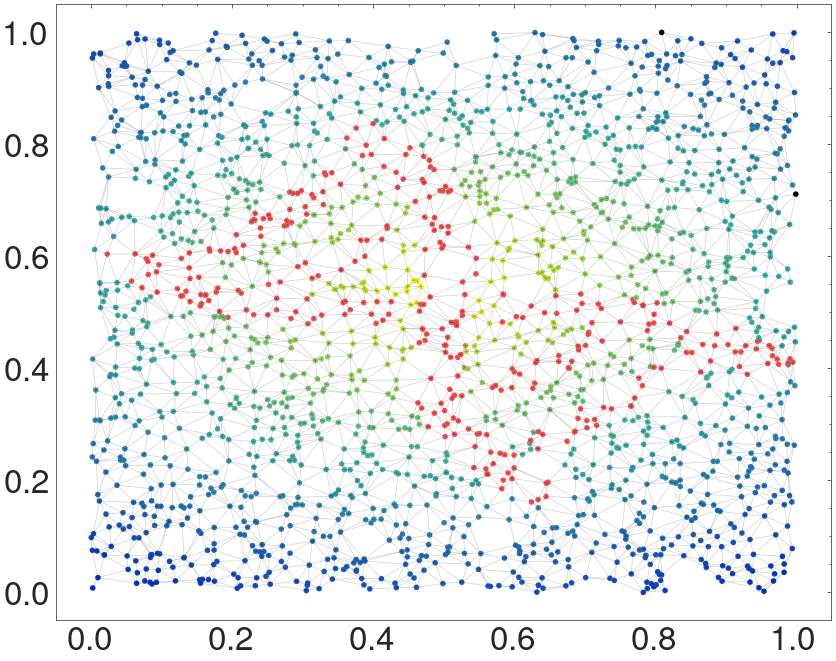

Graph is not an igraph instance. Converting to igraph...
Unweighted graph
Edge list columns are valid.
(False, False, 1384, 81.7966903073286, 81.7966903073286)
average degree igraph 5.858
num points 2000


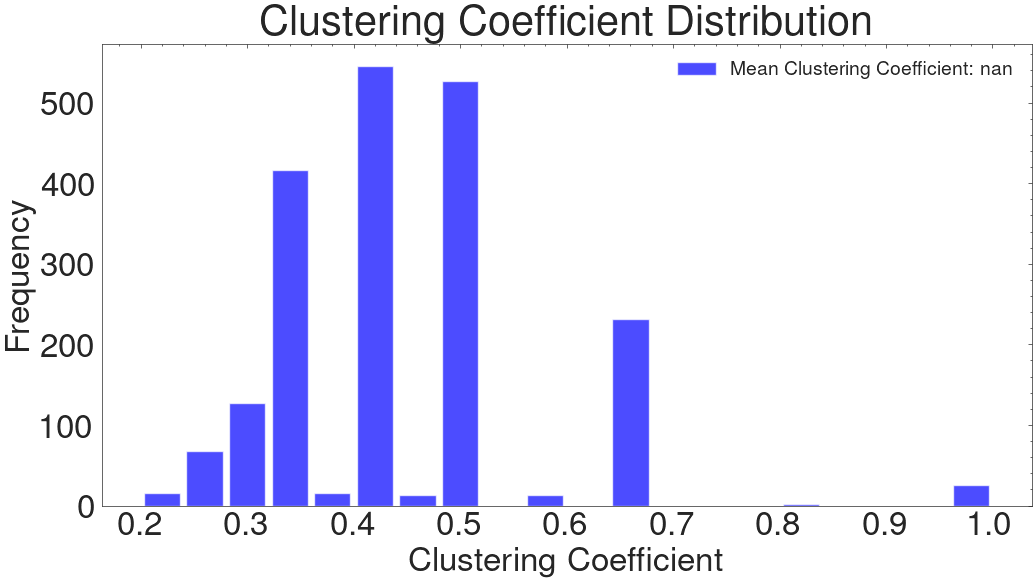

N=2000_dim=2_delaunay_corrected_k=10


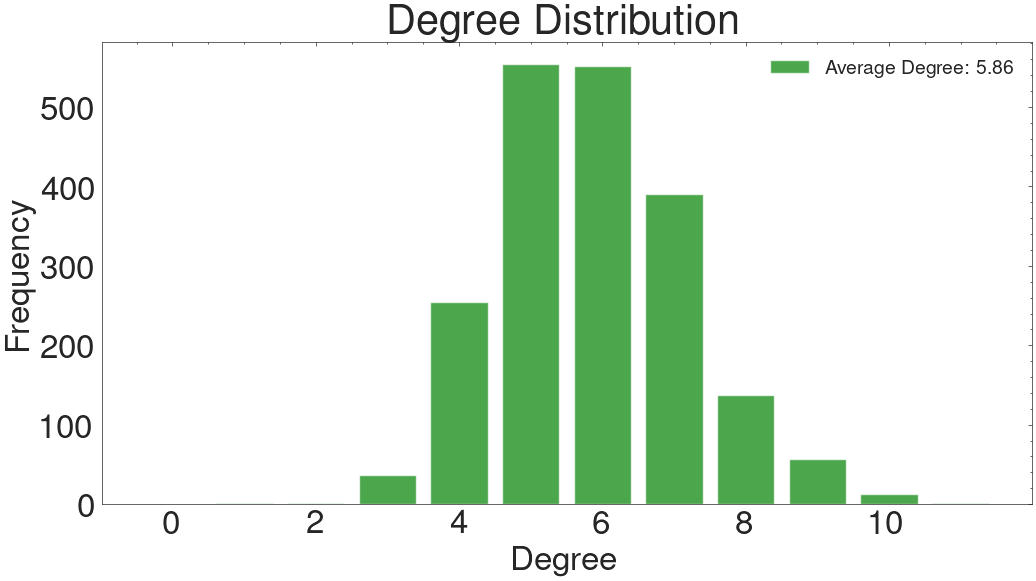

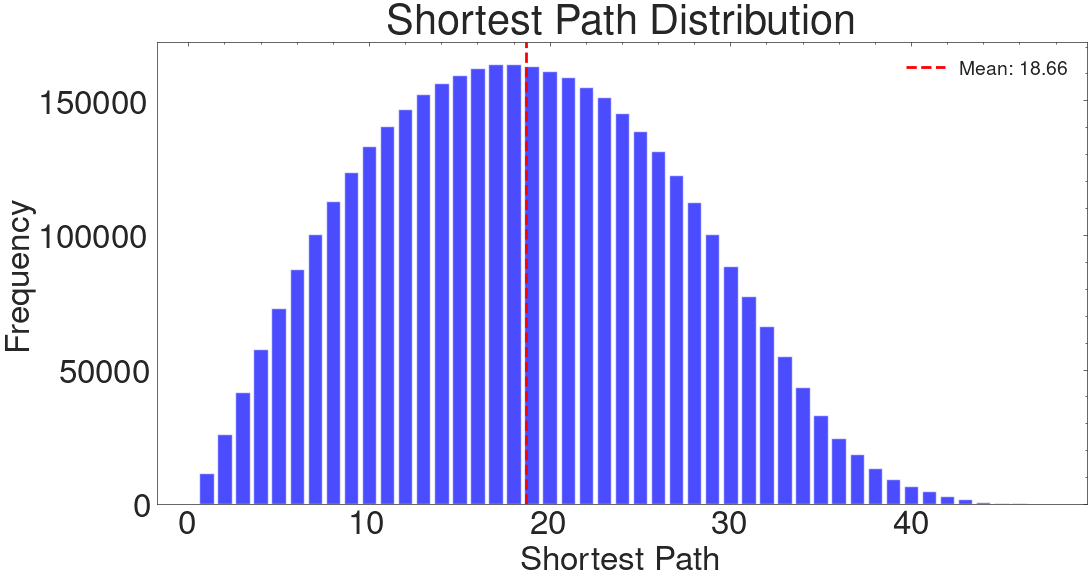

In [6]:
# Load and process the graph
graph, args = nsc_pipeline.load_and_initialize_graph(args=args)
# Plot the original image and the network properties
args.plot_original_image = True
args.plot_graph_properties = True
args.colorfile = 'dna_cool2.png'
nsc_pipeline.plot_and_analyze_graph(graph, args)

Here we simulated a proximity network and plotted the original positions in 2D. Each point is assigned a random position and a color from the image 'dna_cool2.png', depending on its coordinates.
We also plotted some properties.
* Clustering Coefficient: The clustering coefficient is a measure of the degree to which nodes in a network tend to cluster together. It quantifies how likely it is that two nodes connected to a common node are also connected to each other. For proximity networks, the clustering coefficient tends to be higher than in other networks. For example, in the world map, if Germany is connected to France and Belgium, then France and Belgium are probably also connected. Typical values range for the average clustering coefficient range from 0.3 to 0.6
* Degree distribution: Unlike some complex networks, like social networks, proximity networks do not have a power-law distribution. Instead their degree distribution is bounded by spatial constraints, so most nodes have between 2-50 neighbors. The constraint is even harsher for strictly planar networks.
* Shortest Path Distribution: The original Euclidean Distance and the network Shortest Path distance are correlated. This means that the two distributions will look similar.

# Spatial Coherence
We can see how spatially coherent our network is by drawing analogis with Euclidean space.

1. Spatial Constant: do average distances behave as in Euclidean space?
2. Network Dimension: do node growth patterns behave as in Euclidean space?
3. Gram Matrix Analysis: are spectral properties similar to those in Euclidean space?


## 1. Spatial Constant

The spatial constant is a measure that compares the average shortest path distances in the network to those expected in a Euclidean (physical) space. In a purely Euclidean context, distances between points follow predictable patterns, with average distances scaling in a manner that's characteristic of the space's geometry (e.g., linearly in a line, according to the square root in a plane, etc). For a circle in particular we have:

$\langle l \rangle \left( \frac{\rho}{N} \right) ^ {(\frac{1}{2})} \approx \frac{0.9}{\sqrt{\pi}}$

In the context of proximity networks, we calculate the spatial constant by first determining the average distance between nodes in the network and then its average degree:

$\mathcal{S} = \langle l \rangle \left( \frac{\langle k \rangle }{N} \right) ^ {(\frac{1}{d})}$


The result, the spatial constant, should theoretically remain consistent across different scales if the network truly reflects Euclidean space. Variability in this constant indicates the presence of non-Euclidean structures, such as false edges (shortcuts) or merged nodes, which suggests deviations from spatial coherence. 

200
Graph is not an igraph instance. Converting to igraph...


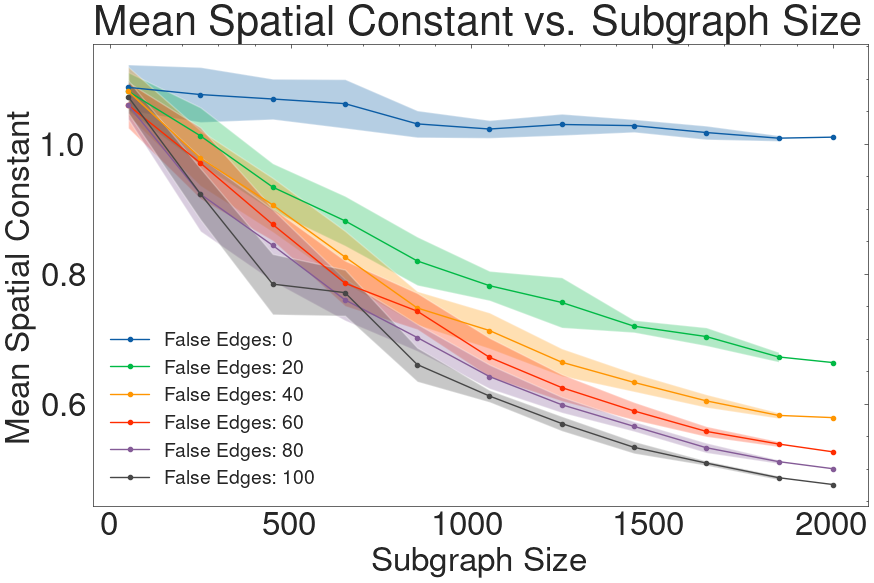

In [7]:
nsc_pipeline.compute_shortest_paths(graph, args)
import matplotlib.pyplot as plt
plt.close('all')
nsc_pipeline.spatial_constant_analysis(graph, args)

## 2. Network Dimension

The network dimension is a concept that draws an analogy to Euclidean space to understand the spatial structure of a network. In Euclidean geometry, the number of points (or nodes) within a certain distance grows according to specific mathematical laws that depend on the space's dimension. For instance, in a two-dimensional space like a flat surface, the number of points within a radius grows as the square of that radius, reflecting the area of a circle.

When we apply this idea to networks, we examine how the number of nodes within a certain shortest path distance (considered the "network radius") grows. By plotting this growth on a logarithmic scale, we can determine the network's effective dimension by analyzing the slope of the line in the plot. This slope, represented as the "dimension," gives us an indication of how the network behaves spatially: it tells us about the network's underlying spatial organization and whether it mimics the characteristics of a physical, Euclidean space.

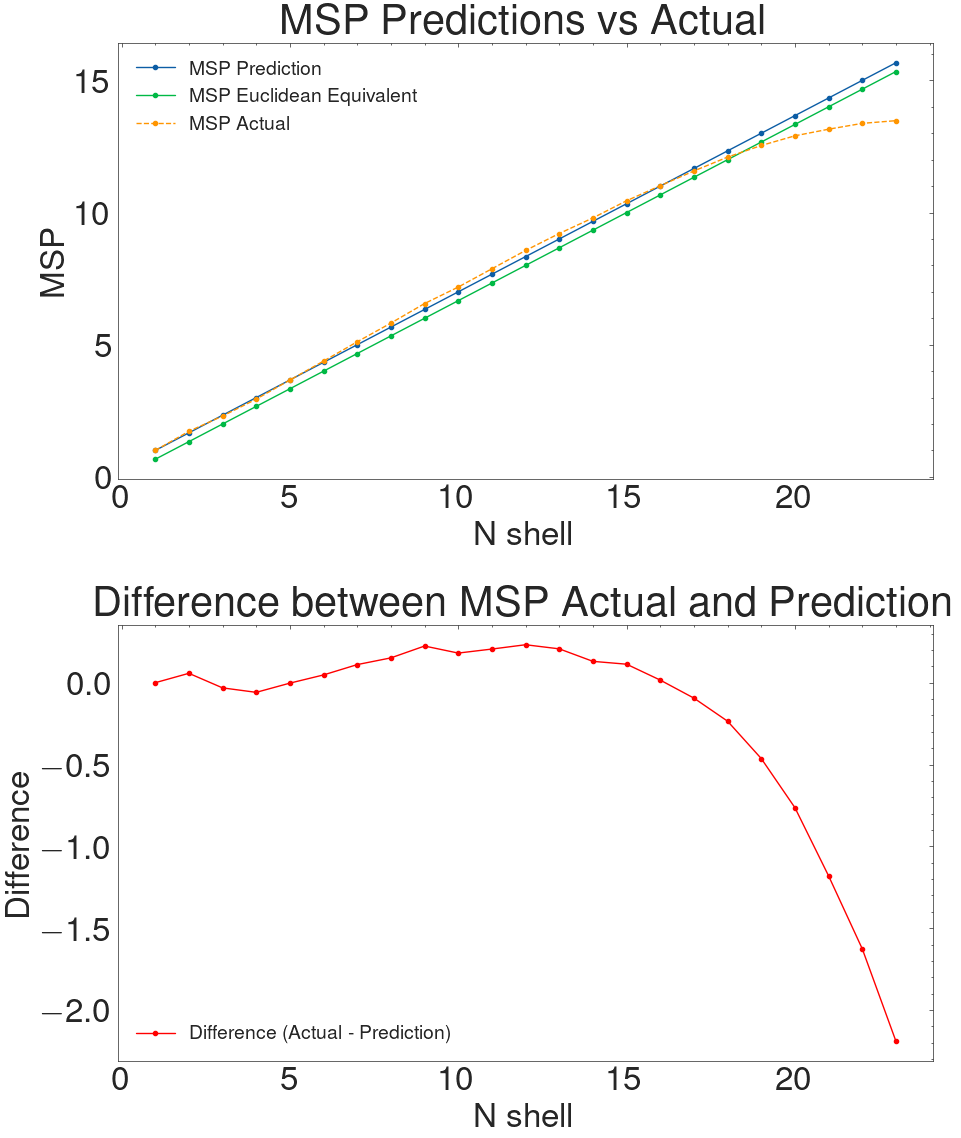

Surface Counts [  8  21  24  32  46  58  73  85 105 100 122 136 137 133 154 141 141 135
 112  91  59  49  21  11   5   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]
Volume Counts [   8   29   53   85  131  189  262  347  452  552  674  810  947 1080
 1234 1375 1516 1651 1763 1854 1913 1962 1983 1994 1999 1999 1999 1999
 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999
 1999 1999 1999 1999 1999]


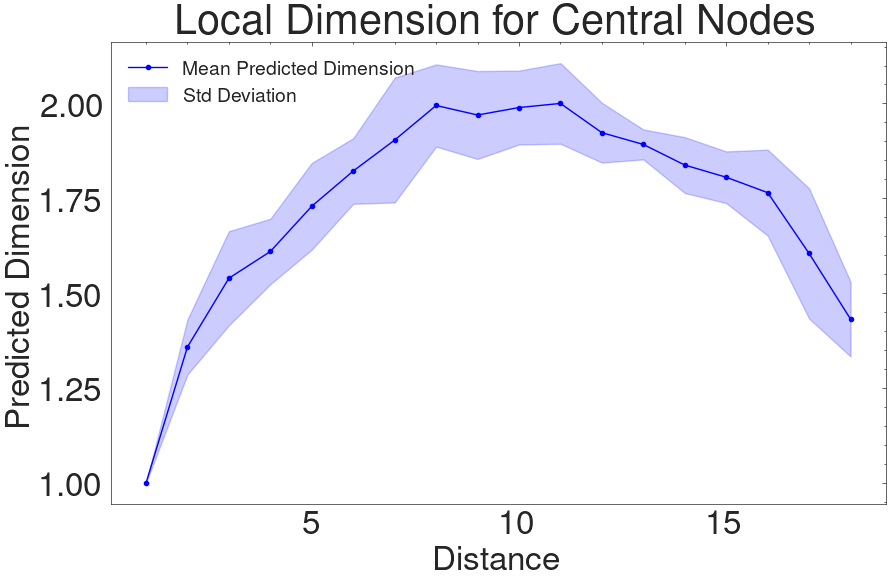

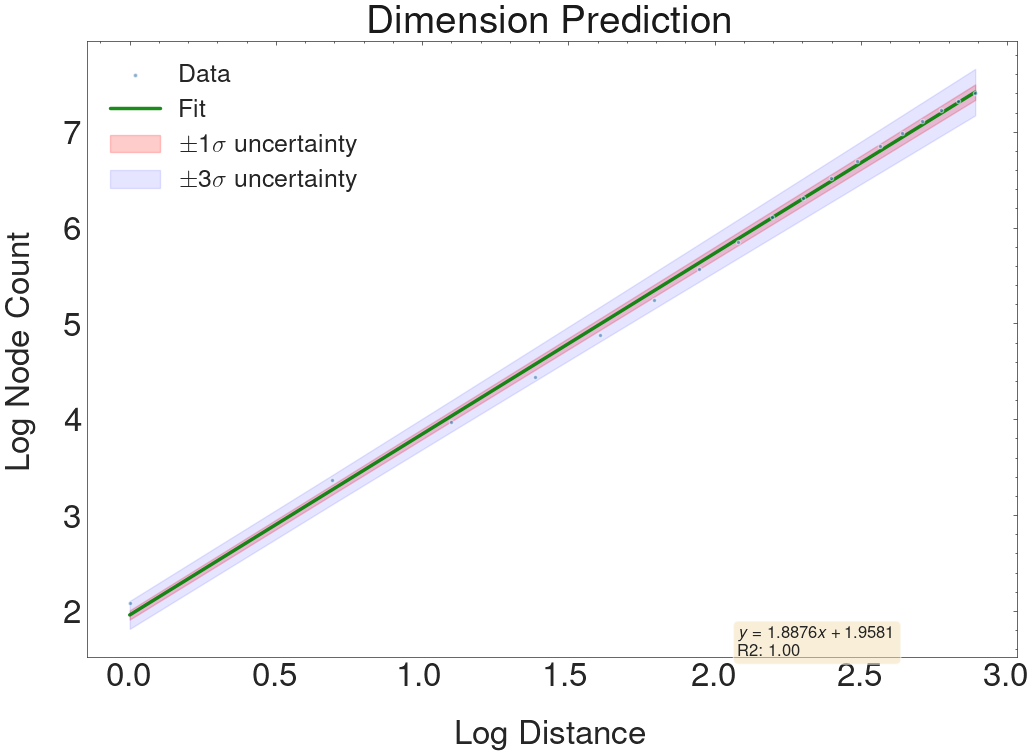

RESULTS DIMENSION PREDICTION FOR SEVERAL CENTRAL NODES {'predicted_dimension': 1.9252936522165223, 'std_predicted_dimension': 0.005592823444431886}


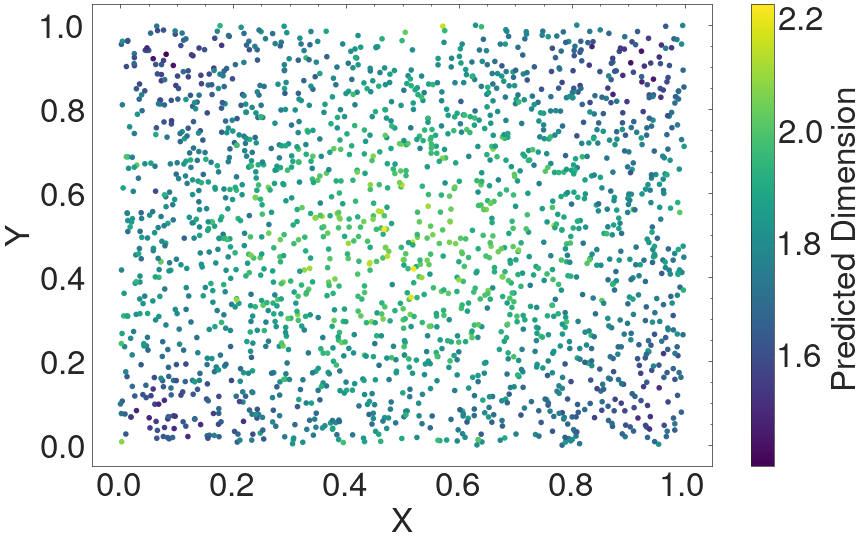

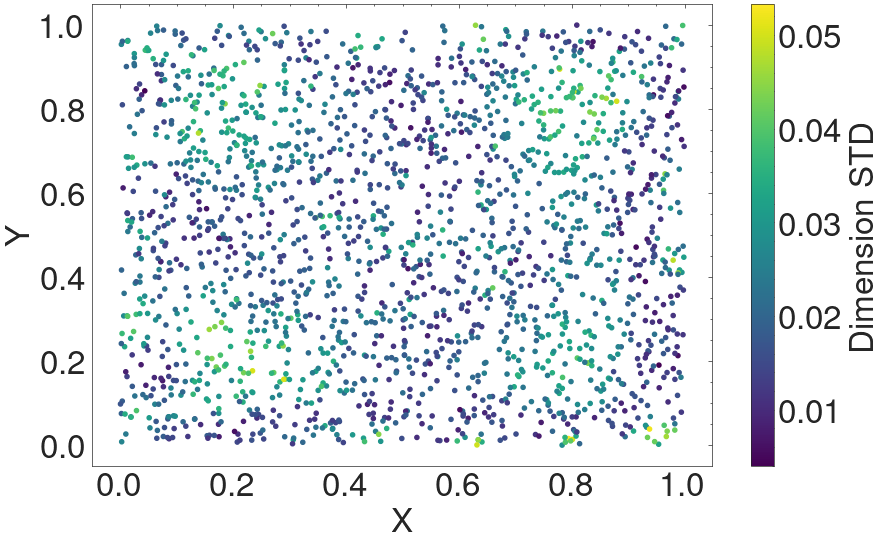

In [8]:
nsc_pipeline.network_dimension(args)

The predicted dimension is close to 2, the original Euclidean dimension

## 3. Gram Matrix Analysis

The Gram Matrix helps us analyze the global structure of the network, as it is created by considering *all* the pairwise distances between nodes. By looking at the matrix's spectral properties, like the mportance of its eigenvalues and their gaps, we can judge whether our distances ressemble Euclidean distances.

### Eigenvalue Contribution
The first *d* eigenvalues (where *d* is the dimension) account for all the contribution in Euclidean space. We expect a similar result in Network space. 

### Spectral Gap

\$\text{gap} = \frac{\lambda_i - \lambda_{i+1}}{\lambda_i} $

The difference (the gap) between the first *d* eigenvalues should be near 0. That is because no dimension has more importance than the other (isotropy), so $\lambda_i - \lambda_{i+1} \approx 0$ . For the eigenvalue *d+1*, however, we expect a gap close to 1, as $\lambda_{d+1} \approx 0$

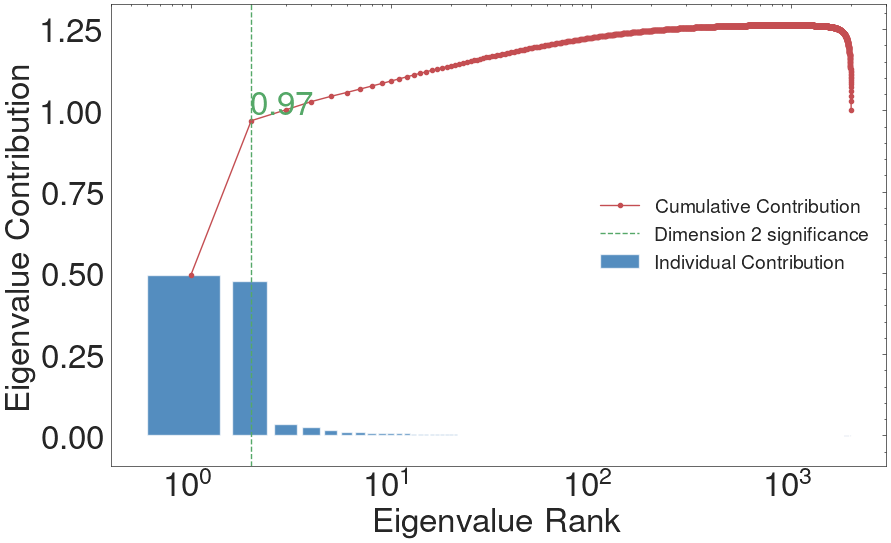

First d values contribution 0.9682278445074004
Proportion of the sum of negative eigenvalues to positive eigenvalues: 0.2555
Spectral gap score: 0.9279904793692653


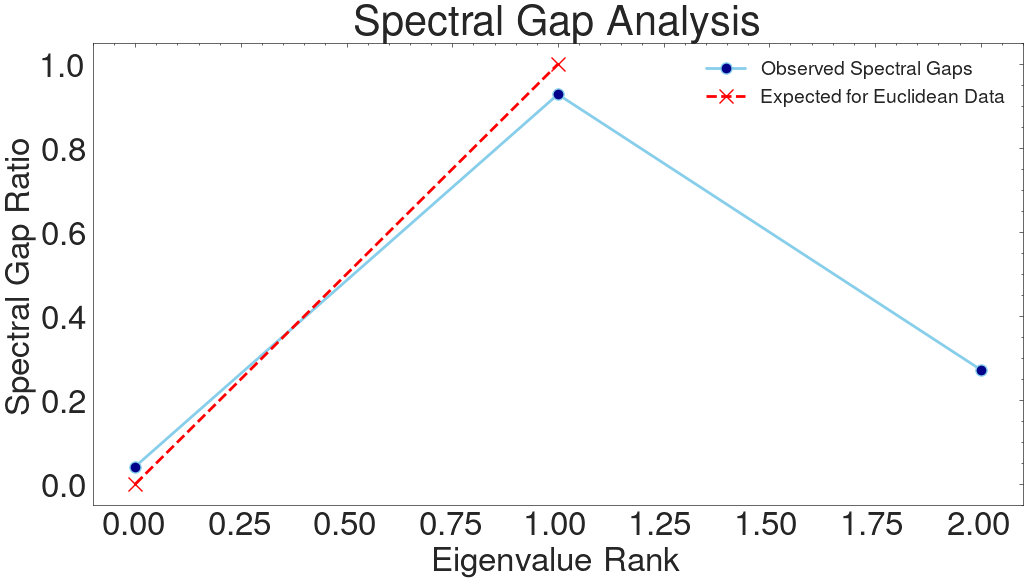

In [9]:
nsc_pipeline.rank_matrix_analysis(args)

The eigenvalue contribution of the first *d* values is close to 1, as expected.
The spectral gaps also behave similar to those of Euclidean data

# Network Reconstruction
If we find that the network is spatially coherent, we can reconstruct the graph with guarantees!

running reconstruction...
reconstruction mode: landmark_isomap


/home/david/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


retrieving edges from edge_list_N=2000_dim=2_delaunay_corrected_k=10.csv


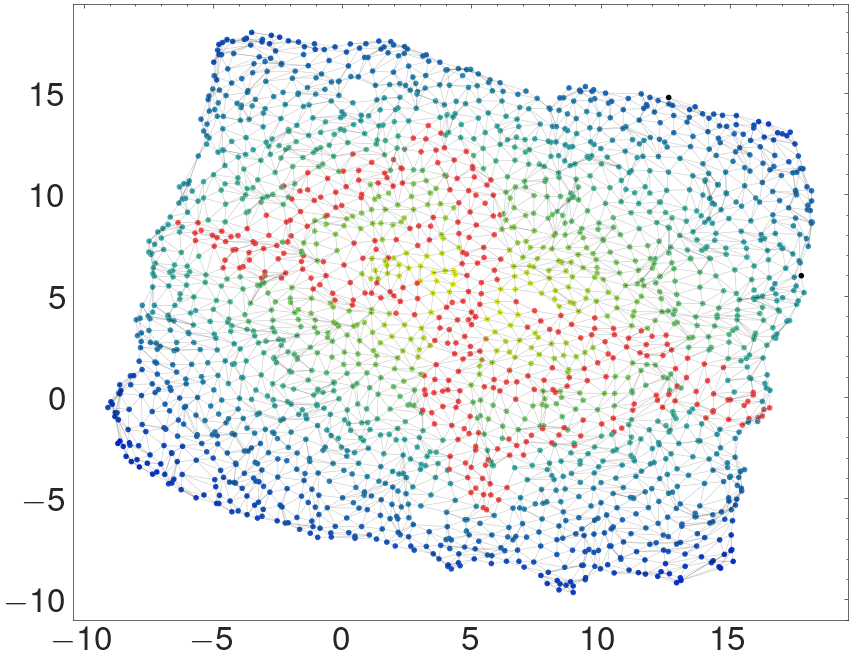

original neighbors [1542 1698  859  168 1979  650  392 1971 1580 1022 1192 1801  615 1651
 1654]
reconstructed neighbors [1979 1542 1801  392  650 1698  859 1192 1580 1022 1302  903   93  168
  615]
{'KNN': 0.7213999999999948, 'CPD': 0.9837650317409004}
{'GTA_KNN': 0.6650905844155822, 'GTA_CPD': 0.9856388571867775}


In [10]:
args.reconstruct = True
args.reconstruction_mode = 'landmark_isomap'
nsc_pipeline.reconstruct_graph(graph, args)